# Métodos de Taylor de Ordem Superior

Métodos que usam o desenvolvimento em série de Taylor de $y(t)$ teoricamente fornecem solução para qualquer ED. Sob o ponto de vista computacional, Métodos de Taylor de ordem mais elevada são inaceitáveis, pois, exceto uma classe restrita de funções, o cálculo das derivadas totais é complicado.

Estes métodos são obtidos retendo-se termos de ordem superior na série de Taylor. Por sua vez, o Método de Euler é um caso particular, como veremos a seguir, já que tem os termos de ordem $\geq 2$ truncados na série.

Suponhamos que $y(t)$ a solução para o PVI
$\begin{cases}
y' = f(t,y) \\
a \leq t \leq b \\
y(a) = \alpha
\end{cases}$
é de classe $\mathcal{C}^{n+1}$. Haja vista que a série de Taylor de $y(t)$ em relação ao ponto $t_i$ pode ser expandida até a ordem $n$ como
\begin{equation*}
y(t_{i+1}) = y(t_i) + {h} y'(t) + \frac{ {h}^2 }{2} y''(t_i) + \dots + \frac{ {h}^n }{n!} y^{(n)}(t_i) + \frac{ {h}^{n+1} }{(n+1)!} y^{(n+1)}(\xi_i), 
\end{equation*}
para $\xi_i \in (t_i,t_{i+1})$.

A diferenciação sucessiva de $y(t)$ fornece
\begin{align*}
y'(t) &= f(t,y(t)) \\
y''(t) &= f'(t,y(t)) \\
		& \vdots  \\
y^k(t) &= f^{(k-1)}(t,y(t))
\end{align*}
Substituindo-as na série de Taylor, temos:

\begin{equation*}
y(t_{i+1}) = y(t_i) + h f(t_i,y(t_i)) + \frac{ h^2 }{2} f'(t_i,y(t_i)) + \dots + 
\frac{ h^n }{n!} f^{(n-1)}(t_i,y(t_i)) + \frac{ h^{n+1} }{(n+1)!} f^{(n)}(\xi_i,y(\xi_i))
\end{equation*}

Excluindo o termo de resto envolvendo $\xi$, obtemos o **Método de Taylor de ordem $n$** através do seguinte processo iterativo
\begin{align*}
w_0 &= \alpha \\
w_{i+1} &= w_i + T^{(n)}(t_i,w_i), \quad i = 0,1,2, \ldots, N
\end{align*}
em que 

$$T^{(n)}(t_i,w_i) = f(t_i,w_i) + \frac{h}{2} f'(t_i,y(t_i)) + \dots + \frac{ h^{n-1} }{n!}f^{(n-1)}(t_i,w_i).$$

Logo, vemos que o método de Euler é o Método de Taylor de ordem 1. As derivadas sucessivas podem ser calculadas pela Regra da Cadeia. Por exemplo, 

$$y' = f(t,y) \Rightarrow  y'' = f_t(t,y) + f_y(t,y) y' = f_t(t,y) + f_y(t,y) f(t,y).$$ 

Todavia, os métodos da família Runge-Kutta são alternativas numéricas melhores para métodos de Taylor pois simulam o efeito das derivadas a partir de cálculos médios que não necessitam de derivadas analíticas. Estudaremos métodos de Runge-Kutta em breve.  


**Exemplo:** Aplique o Método de Taylor de ordem 2 ao PVI

$$\begin{cases}
y'= y − t^2 + 1 \\
0 \leq t \leq 2 \\
y(0) = 0.5.
\end{cases}$$

Para o método de ordem 2, precisamos da primeira derivada de $f(t,y(t)) = y(t) − t^2 + 1$ em relação a $t$. Então,

$$f'(t,y(t)) = \frac{d}{dt} (y − t^2 + 1) = y' − 2t = (y − t^2 + 1) − 2t,$$

de modo que

$$T^{(2)}(t_i,w_i) = 
f(t_i,w_i)+ \frac{h}{2}f'(t_i,w_i) = w_i − t_i^2 + 1 + \frac{h}{2}(w_i − t_i^2 + 1 − 2t_i) = \\
= \left( 1 + \frac{h}{2} \right) (w_i − t_i^2 + 1) − ht_i$$

Como $N = 10$, temos $h = 0.2$ e $t_i = 0.2i, \forall i = 1,2,...,10$. Assim, o método de segunda ordem torna-se

$$w_0 = 0.5 \\
w_{i+1} = w_i + h \left[ \left(1 + \frac{h}{2} \right)(w_i − t_i^2 + 1) − h t_i \right] = \\
= w_i + 0.2 \left[ \left(1 + \frac{0.2}{2} \right) (w_i − 0.04i^2 + 1) −0.04i \right] \\
= 1.22w_i − 0.0088i^2 − 0.008i + 0.22.$$

Os dois primeiros passos dão a aproximação: 

$$y(0.2) \approx w_1 = 1.22(0.5) − 0.0088(0)^2 − 0.008(0) + 0.22 = 0.83$$
$$y(0.4) \approx w_2 = 1.22(0.83) − 0.0088(0.2)^2 − 0.008(0.2) + 0.22 = 1.2158$$
$$(\ldots)$$

Os demais passos seguem da mesma forma

## Métodos de Runge-Kutta

O objetivo principal dos métodos de Runge-Kutta (RK) é imitar o comportamento de $f(t,y)$ avaliando-a em vários pontos "abstratos" dentro de um mesmo passo numérico. 

Esquemas do tipo RK são usados para reter precisão e substituir aproximações de baixa ou alta ordem via séries de Taylor. São populares na resolução de PVIs e mais simples de programar do que os métodos de Taylor. 

### Forma geral 

A forma geral de um método RK é dada por: 

$$\begin{cases}
w_{n+1} &=& w_n + hF(t_n,w_n;h), \ \ n \geq 0 \\
w_0 &=& y_0
\end{cases}$$

O termo $F(t_n,w_n;h)$ representa uma _inclinação média_, de maneira que, informalmente, métodos RK seja refraseados como: 

_valor futuro = valor atual + passo x inclinação média_. 

Se fizéssemos uma analogia com o movimento uniforme da física, $w$ seria uma posição do espaço, $h$ o tempo e $F$ a velocidade, resultando em 

_posição final = posição inicial + tempo x velocidade_ 

ou, equivalentemente, $s_f = s_0 + vt$. 

### Métodos de Runge-Kutta de 2a. ordem

Para métodos RK2, a inclinação média é dada pela expressão

$$F(t,w;h) = b_1 f(t,w) + b_2 f(t+\alpha h, w + \beta h f(t,w),$$

em que $\alpha, \beta, b_1, b_2 \in \mathbb{R}$ são constantes a serem determinadas de modo que atinjamos um erro de truncamento 

$$T_{n+1}(w) = w_{n+1} - [ w_n + h F(t_n,w_n;h) ] \equiv \mathcal{O}(h^3),$$

i.e., seja de terceira ordem.

Abaixo, vamos resolver o PVI: 

\begin{cases}
y' = -1.2y + 7e^(-0.3x) \\
y(0) = 3 \\
0 < x \leq 2 \\
h = 1,0.5,0.25,0.1
\end{cases}


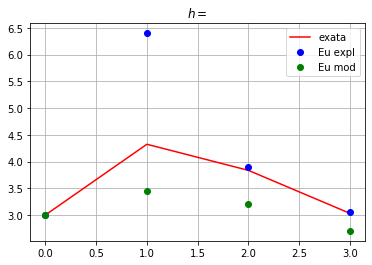

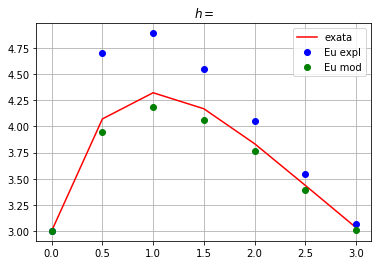

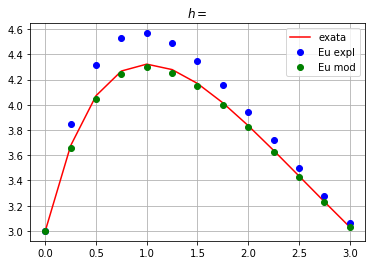

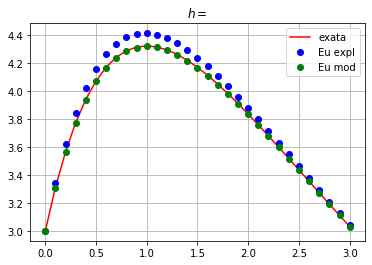

In [3]:
# definição
e = np.exp(1)

# dados de entrada 
a = 0
b = 3.0
ns = [4,7,13,31]
w0 = 3
ode = '-1.2*y + 7*e**(-0.3*x)'

# soluções numéricas

for n in ns:
    # MEE
    x,we = ode_euler_expl(ode,a,b,n,w0)

    # MEM
    x,wm = ode_euler_mod(ode,a,b,n,w0)

    # conversao de dados
    x = np.asarray(x)
    we = np.asarray(we)
    wm = np.asarray(wm)

    # solução exata
    y = 70/9*e**(-0.3*x) - 43/9*e**(-1.2*x)

    # curvas
    plt.figure()
    plt.plot(x,y,'r',label='exata')
    plt.plot(x,we,'bo',label='Eu expl')
    plt.plot(x,wm,'go',label='Eu mod')
    plt.legend()
    tit = '$h = ' + str((b-a)/(n-1)) + '$'
    plt.title('$h=$')
    plt.grid()
